# Cultural, Racial and Gender Representation in Marvel

In [1]:
import json
from os.path import join
from os import listdir
import socket

In [2]:
data = "./characters"
json_db = [join(data, json_file) for json_file in listdir(data)]
print("The Marvel databse contains a list of {} characters".format(len(json_db)))

The Marvel databse contains a list of 1402 characters


In [3]:
import pandas as pd

In [4]:
# create dataframe with Marvel hero data
json_to_dataframe = []
for json_file in json_db:
    with open(json_file, 'r') as f:
        json_character = json.loads(''.join(f.readlines()))
        json_plain = pd.io.json.json_normalize(json_character)
        json_to_dataframe.append(json_plain)
        
marvel_df = pd.concat(json_to_dataframe)

In [5]:
marvel_df.head()

,comics.available,comics.collectionURI,comics.items,comics.returned,description,events.available,events.collectionURI,events.items,events.returned,id,...,wiki.specieshistory,wiki.team_name,wiki.teamicon,wiki.technology,wiki.tie-ins,wiki.title_graphic,wiki.universe,wiki.weapons,wiki.weaponss,wiki.weight
0,36,http://gateway.marvel.com/v1/public/characters...,"[{'id': 36737, 'resourceURI': 'http://gateway....",36,AIM is a terrorist organization bent on destro...,0,http://gateway.marvel.com/v1/public/characters...,[],0,1009144,...,NaN,NaN,NaN,NaN,NaN,NaN,[[Marvel Universe]],NaN,NaN,NaN
0,43,http://gateway.marvel.com/v1/public/characters...,"[{'id': 34050, 'resourceURI': 'http://gateway....",43,"Formerly known as Emil Blonsky, a spy of Sovie...",2,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,2,1009146,...,NaN,NaN,NaN,NaN,NaN,NaN,Marvel Universe,None,NaN,(Abomination) 980 lbs.; (Blonsky) 180 lbs.
0,43,http://gateway.marvel.com/v1/public/characters...,"[{'id': 36489, 'resourceURI': 'http://gateway....",43,,4,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,4,1009148,...,NaN,NaN,NaN,NaN,NaN,NaN,[[Marvel Universe]],"He uses a prison ball-and-chain as a weapon, a...",NaN,365 lbs. (variable)
0,8,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,8,,1,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,1,1009149,...,NaN,NaN,NaN,NaN,NaN,NaN,[[Marvel Universe]],Unrevealed,NaN,Unrevealed
0,20,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,20,,0,http://gateway.marvel.com/v1/public/characters...,[],0,1009150,...,NaN,NaN,NaN,NaN,NaN,NaN,[[Marvel Universe]],Agent Zero carries a wide array of weapons inc...,NaN,230 lbs.


In [6]:
# check the size of the dataframe
marvel_df.shape

(1402, 89)

In [7]:
# there are 89 fields of Marvel data. let's take a look
', '.join(marvel_df.columns.values)

'comics.available, comics.collectionURI, comics.items, comics.returned, description, events.available, events.collectionURI, events.items, events.returned, id, modified, name, resourceURI, series.available, series.collectionURI, series.items, series.returned, stories.available, stories.collectionURI, stories.items, stories.returned, thumbnail.extension, thumbnail.path, urls, wiki.Date_of_birth, wiki.Place_of_birth, wiki.abilities, wiki.aliases, wiki.appearance, wiki.base_of_operations, wiki.bio, wiki.bio_text, wiki.blurb, wiki.builder, wiki.categories, wiki.categorytext, wiki.citizenship, wiki.creator, wiki.creators, wiki.current_members, wiki.debut, wiki.distinguishing_features, wiki.dstinguishing_features, wiki.education, wiki.event_text, wiki.eyes, wiki.features, wiki.former_members, wiki.govenment, wiki.government, wiki.groups, wiki.hair, wiki.height, wiki.home_world, wiki.identity, wiki.key_characters, wiki.key_issues, wiki.leader, wiki.location, wiki.main_image, wiki.members, wik

In [8]:
# remove columns that contain no information
marvel_df.dropna()

,comics.available,comics.collectionURI,comics.items,comics.returned,description,events.available,events.collectionURI,events.items,events.returned,id,...,wiki.specieshistory,wiki.team_name,wiki.teamicon,wiki.technology,wiki.tie-ins,wiki.title_graphic,wiki.universe,wiki.weapons,wiki.weaponss,wiki.weight


In [9]:
# data clean up
# There are no distinctions between individual characters and teams
# in the Marvel API. That means that the Avengers can have the same status
# as Rachel Grey. the Former Members field can help sort this out.
# eliminate null values in current character
marvel_df.dropna(subset=['wiki.current_members'])['name']

0                               A.I.M.
0                             Avengers
0          Brotherhood of Evil Mutants
0                               Exiles
0                       Fantastic Four
0                          Force Works
0                        Hellfire Club
0                                Hydra
0                       Imperial Guard
0                            Marauders
0                              Reavers
0                         S.H.I.E.L.D.
0                      Serpent Society
0                              X-Force
0                                X-Men
0                             The Hand
0                         Thunderbolts
0                         Alpha Flight
0                         New Warriors
0                             Nextwave
0                       Young Avengers
0                             X-Factor
0              X-Factor Investigations
0                             Runaways
0                            Champions
0                        

In [10]:
%timeit (~marvel_df['wiki.current_members'].isnull())

import numpy as np
%timeit (np.invert(marvel_df['wiki.current_members'].isnull()))

144 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
155 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
not_groups_mask = marvel_df['wiki.current_members'].isnull()
not_groups_mask.head()

0    False
0     True
0     True
0     True
0     True
Name: wiki.current_members, dtype: bool

In [12]:
marvel_df_characters = marvel_df[not_groups_mask]
marvel_df_characters.head()

,comics.available,comics.collectionURI,comics.items,comics.returned,description,events.available,events.collectionURI,events.items,events.returned,id,...,wiki.specieshistory,wiki.team_name,wiki.teamicon,wiki.technology,wiki.tie-ins,wiki.title_graphic,wiki.universe,wiki.weapons,wiki.weaponss,wiki.weight
0,43,http://gateway.marvel.com/v1/public/characters...,"[{'id': 34050, 'resourceURI': 'http://gateway....",43,"Formerly known as Emil Blonsky, a spy of Sovie...",2,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,2,1009146,...,NaN,NaN,NaN,NaN,NaN,NaN,Marvel Universe,None,NaN,(Abomination) 980 lbs.; (Blonsky) 180 lbs.
0,43,http://gateway.marvel.com/v1/public/characters...,"[{'id': 36489, 'resourceURI': 'http://gateway....",43,,4,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,4,1009148,...,NaN,NaN,NaN,NaN,NaN,NaN,[[Marvel Universe]],"He uses a prison ball-and-chain as a weapon, a...",NaN,365 lbs. (variable)
0,8,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,8,,1,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,1,1009149,...,NaN,NaN,NaN,NaN,NaN,NaN,[[Marvel Universe]],Unrevealed,NaN,Unrevealed
0,20,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,20,,0,http://gateway.marvel.com/v1/public/characters...,[],0,1009150,...,NaN,NaN,NaN,NaN,NaN,NaN,[[Marvel Universe]],Agent Zero carries a wide array of weapons inc...,NaN,230 lbs.
0,11,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,11,,1,http://gateway.marvel.com/v1/public/characters...,[{'resourceURI': 'http://gateway.marvel.com/v1...,1,1009151,...,NaN,NaN,NaN,NaN,NaN,NaN,Marvel Universe,,NaN,100 lbs


In [13]:
# check dataframe size after cleaning 
marvel_df_characters.shape

(1332, 89)

Originally this dataset started with 1402 characters including the ones in teams. After deleting times there are now 1332 characters. 4.9929% of the data was lost.

## Representation in Marvel Comics

This is a case study to learn how marginalized groups are represented in Marvel Comics. This case study will focus on gender (male/female), race, and cultural background. 


### Race

In [14]:
marvel_df_characters['wiki.skin'].dropna()

0    White (as GAmbit), Black (as Death)
Name: wiki.skin, dtype: object

Not much to analyze here. Let's try looking at the types of characters. 

In [15]:
marvel_groups = marvel_df.dropna(subset=['wiki.current_members'])
marvel_groups['wiki.leader'].dropna()

0    Steve Rogers
0                
Name: wiki.leader, dtype: object

This also didn't work

### Delecting character with no information 
To make sure we have a cleaner dataset, we need to get rid of all the heroes with no information. This will simplify the machine learning process

The following columns will be selected from the data frame since they may provide useful information with this case study:

- id
- name
- description
- education
- weight
- height
- bio
- hair color
- eye color
- citizenship
- place of birth

In [16]:
# group column attributes
physical_data = {'wiki.hair':'hair', 
                 'wiki.weight':'weight',
                 'wiki.height':'height',
                 'wiki.eyes':'eyes'}

cultural_data = {'wiki.place_of_birth':'place_of_birth',
                 'wiki.education':'education',
                 'wiki.citizenship':'citizenship',
                 'wiki.occupation':'occupation'}

personal_data = {'wiki.bio':'bio',
                 'wiki.bio_text':'bio',
                 'wiki.categories':'categories'}

hero_data = {'wiki.abilities':'abilities',
             'wiki.powers':'powers',
             'wiki.weapons':'weapons',}

data_keys = (list(physical_data.keys()) + list(cultural_data.keys()) +
    list(personal_data.keys()) + ['name','comics.available'])

In [17]:
print(data_keys)

['wiki.hair', 'wiki.weight', 'wiki.height', 'wiki.eyes', 'wiki.place_of_birth', 'wiki.education', 'wiki.citizenship', 'wiki.occupation', 'wiki.bio', 'wiki.bio_text', 'wiki.categories', 'name', 'comics.available']


In [18]:
clean_df = marvel_df_characters.dropna(subset = data_keys)
clean_df = clean_df[data_keys].set_index('name')
clean_df.shape

(762, 12)

### Exploring the New Data Frame

#### Physical Data

In [19]:
clean_df[list(physical_data.keys())].head()

,wiki.hair,wiki.weight,wiki.height,wiki.eyes
name,,,,
Abomination (Emil Blonsky),(Abomination) None; (Blonsky) Blond,(Abomination) 980 lbs.; (Blonsky) 180 lbs.,"(Abomination) 6'8""; (Blonsky) 5'10""",(Abomination) Green; (Blonsky) Blue
Absorbing Man,Bald,365 lbs. (variable),"6'4"" (variable)",Blue
Abyss,Unrevealed,Unrevealed,Unrevealed,Unrevealed
Agent Zero,(Originally) Brown; (currently) Black,230 lbs.,"6'3""",Blue
Annihilus,None,200 lbs.,"5'11""",Green


In [20]:
clean_df[list(physical_data.keys())].describe()

,wiki.hair,wiki.weight,wiki.height,wiki.eyes
count,762,762,762,762
unique,223,307,213,165
top,Black,Unrevealed,Unrevealed,Blue
freq,165,48,44,236


#### Cultural Characteristics

In [21]:
clean_df[list(cultural_data.keys())].head()

,wiki.place_of_birth,wiki.education,wiki.citizenship,wiki.occupation
name,,,,
Abomination (Emil Blonsky),"Zagreb, Yugoslavia",Unrevealed,Citizen of Croatia; former citizen of Yugoslavia,"Professional Criminal, Former Spy"
Absorbing Man,"New York City, New York",High school dropout,U.S.A. with a criminal record,Professional criminal; former boxer
Abyss,Unrevealed,Unrevealed,Unrevealed,Cosmic sorcerer
Agent Zero,Unrevealed location in former East Germany,Unrevealed,German,"Mercenary, former government operative, freedo..."
Annihilus,"Planet of [[Arthros]], Sector 17A, [[Negative ...",Unrevealed,Arthros,"Conqueror, scavenger"


In [22]:
clean_df[list(cultural_data.keys())].describe()

,wiki.place_of_birth,wiki.education,wiki.citizenship,wiki.occupation
count,762,762,762,762
unique,412,357,262,636
top,Unrevealed,Unrevealed,U.S.A.,Adventurer
freq,156,236,230,31


The amount of valid data had to be reduced again. This dataset started with 1402 characters with any useful information. Now, eliminating teams and null info, 45.6491% of the data was lost.

So far it appears that the archetypal Marvel character is a blue-eyed and dark hair adventurer from the USA.

Here's a look at the data frame now:

In [23]:
clean_df.dtypes

wiki.hair              object
wiki.weight            object
wiki.height            object
wiki.eyes              object
wiki.place_of_birth    object
wiki.education         object
wiki.citizenship       object
wiki.occupation        object
wiki.bio               object
wiki.bio_text          object
wiki.categories        object
comics.available        int64
dtype: object

In [24]:
clean_df.describe()

,comics.available
count,762.000000
mean,53.292651
std,179.820372
min,0.000000
25%,2.000000
50%,10.000000
75%,33.750000
max,2575.000000


In [25]:
# who has's that many comics!?!? Let's take a look!
clean_df[clean_df['comics.available'] == 2575.000000] 

,wiki.hair,wiki.weight,wiki.height,wiki.eyes,wiki.place_of_birth,wiki.education,wiki.citizenship,wiki.occupation,wiki.bio,wiki.bio_text,wiki.categories,comics.available
name,,,,,,,,,,,,
Spider-Man,Brown,167 lbs.,"5'10""",Hazel,"Forest Hills, New York","College graduate (biophysics major), doctorate...",U.S.A.,Scientist and inventor; former freelance photo...,The bite of an irradiated spider granted high-...,The bite of an irradiated spider granted high-...,"[Avengers, Civil War, Heroes, Marvel Knights, ...",2575


I've always figured that Spiderman would have the most comics but I just had to be sure!

The purpose of this is learning more about representation but there has not been much useful data for skin color which could have given insight on racial representation, or a sex or gender field to find out more about gender.

Let's try `wiki.categories` to see if there's any useful information.

In [26]:
clean_df['wiki.categories']

name
Abomination (Emil Blonsky)       [Avengers, Deceased, Hulk, International, Vill...
Absorbing Man                                      [Avengers, Civil War, Villains]
Abyss                                                    [Cosmic, Magic, Villains]
Agent Zero                       [Heroes, X-Men, Villains, International, Mutants]
Annihilus                         [Annihilation, Cosmic, Fantastic Four, Villains]
Apocalypse                               [Mutants, Villains, International, X-Men]
Spider-Girl (Anya Corazon)       [Women, Heroes, Spider-Man, Civil War, Initiat...
Arcade                                               [Spider-Man, Villains, X-Men]
Archangel                              [X-Men, Heroes, Reformed Villains, Mutants]
Arclight                         [X-Men, Women, Villains, Mutants, People who u...
Aurora                           [Heroes, Women, X-Men, International, Canadian...
Avalanche                                [X-Men, International, Villains, Mutants]

Instead of having a field for gender, Marvel has included it in `wiki.categories` among other information.

Two new columns in the data frame will be created to better understand the information:

* women: True if the character is a woman, false if not
* villian: True if the character is a villian, false if not.

In [27]:
women = clean_df['wiki.categories'].map(lambda x: 'Women' in x)
clean_df['Women'] = women
women[:10]

name
Abomination (Emil Blonsky)    False
Absorbing Man                 False
Abyss                         False
Agent Zero                    False
Annihilus                     False
Apocalypse                    False
Spider-Girl (Anya Corazon)     True
Arcade                        False
Archangel                     False
Arclight                       True
Name: wiki.categories, dtype: bool

In [28]:
print("Women: {}, Men: {}".format(clean_df[women].shape[0], clean_df[~women].shape[0]))

Women: 199, Men: 563


There are 199 female characters and 563 male characters. These female characters make up 26% of the data frame.

Let's take the data and see how many male and female characters are heroes and villians.

In [29]:
villain = clean_df['wiki.categories'].map(lambda x: 'Villains' in x)
clean_df['Villain'] = villain
villain[:10]

name
Abomination (Emil Blonsky)     True
Absorbing Man                  True
Abyss                          True
Agent Zero                     True
Annihilus                      True
Apocalypse                     True
Spider-Girl (Anya Corazon)    False
Arcade                         True
Archangel                     False
Arclight                       True
Name: wiki.categories, dtype: bool

In [30]:
men = ~women
gender_data = {'Women': {'Heroes':0, 'Villains': 0}, 'Men':{'Heroes':0, 'Villains':0}}

# Female Heroes
gender_data['Women']['Heroes'] = clean_df[~villain & women].shape[0]

# Female Villians
gender_data['Women']['Villains'] = clean_df[villain & women].shape[0]

# Male Heroes
gender_data['Men']['Heroes'] = clean_df[~villain & men].shape[0]

# Malee Villians
gender_data['Men']['Villains'] = clean_df[villain & men].shape[0]

In [31]:
gender_data

{'Men': {'Heroes': 362, 'Villains': 201},
 'Women': {'Heroes': 169, 'Villains': 30}}

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

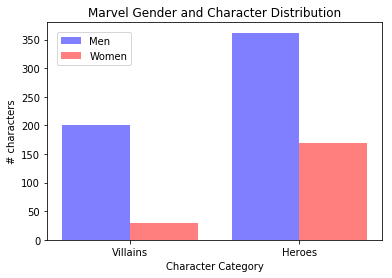

In [33]:
n_groups = 2
male_data = (gender_data['Men']['Villains'], gender_data['Men']['Heroes'])
female_data = (gender_data['Women']['Villains'], gender_data['Women']['Heroes'])

figure, axes = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.5

male_bars = plt.bar(index, male_data, bar_width,
                   alpha=opacity,
                   color='b',
                   label='Men')
female_bars = plt.bar(index + bar_width, female_data, bar_width,
                   alpha=opacity,
                   color='r',
                   label='Women')

plt.xlabel('Character Category')
plt.ylabel('# characters')
plt.title('Marvel Gender and Character Distribution')
plt.xticks(index + bar_width - .2, ('Villains', 'Heroes'))
plt.legend(loc=0, borderaxespad=1.)

plt.show()

## Machine Learning

Machine Learning is a series of algorithms teaching a machine how to learn from a set of data. With Machine Learning we can predit future events, classify data, and **discover patterns in data**

### K-Nearest Neighbors (knn)

For the marvel dataset, KNN will be used to classify the characters and predict trends with the dataset.

### Physical Classifier

Let's make a classifier for the physical traits of the characters

In [34]:
clean_df['wiki.height'].describe()

count            762
unique           213
top       Unrevealed
freq              44
Name: wiki.height, dtype: object

In [35]:
physical = clean_df[clean_df['wiki.weight'] != "Unrevealed"]

In [36]:
any(physical['wiki.height'] == "Unrevealed")

False

There are still more problems with the data. Thankfully, those with no data on weight are the same as those with no data on height.

In [37]:
physical_knn = physical[['wiki.weight', 'wiki.height', 'Women', 'Villain']]

In [38]:
physical_knn.dtypes

wiki.weight    object
wiki.height    object
Women            bool
Villain          bool
dtype: object

In [39]:
physical_knn

,wiki.weight,wiki.height,Women,Villain
name,,,,
Abomination (Emil Blonsky),(Abomination) 980 lbs.; (Blonsky) 180 lbs.,"(Abomination) 6'8""; (Blonsky) 5'10""",False,True
Absorbing Man,365 lbs. (variable),"6'4"" (variable)",False,True
Agent Zero,230 lbs.,"6'3""",False,True
Annihilus,200 lbs.,"5'11""",False,True
Apocalypse,300 lbs. (variable),Variable (usually around 7'),False,True
Spider-Girl (Anya Corazon),115 lbs.,"5'3""",True,False
Arcade,140 lbs.,"5'6""",False,True
Archangel,150 lbs.,6',False,False
Arclight,126 lbs.,"5'8""",True,True


In [40]:
physical_knn.applymap(str)
physical_knn = physical_knn[physical_knn['wiki.weight'].str.contains("lbs.")]
physical_knn = physical_knn[physical_knn['wiki.height'].str.contains('’|\'')]

In [41]:
def get_weight(pandas_weight):
    """returns fist int param in a string"""
    for p in pandas_weight.split():
        try:
            return int(p)
        except ValueError:
            pass

In [42]:
physical_knn['wiki.weight'] = physical_knn['wiki.weight'].map(get_weight)

In [43]:
FOOT = 30.48
INCH = 2.54
def get_height(pandas_height):
    """ Return first int parameter in a string """
    
    height = None 
    for p in pandas_height.split():
        colon_split = p.split('\'')
        strange_colon_split = p.split('’')
        if len(colon_split) == 2 :
            height = colon_split
        elif len(colon_split) == 4 :
            height = colon_split[:2]
            height[1] += "\'" 
        elif len(strange_colon_split) == 2 :
            height = strange_colon_split
        elif len((pandas_height.split()[-1]).split('\'')) == 2:
            height = pandas_height.split()[-1].split('\'')
        elif len((pandas_height.split()[-1]).split('’')) == 2:
            height = pandas_height.split()[-1].split('’')
                
        else:
            universe_split = ((pandas_height.split(';')[0]).split()[-1]).split('\'')
            if len(universe_split) == 2:
                height = universe_split
            else:
                space_split = (pandas_height.split(';')[0].split()[-2:])
                if space_split[0][-1] == '\'' or space_split[0][-1] == '’':
                    height = [space_split[0][:-1], space_split[1]]
                else:
                    return None
        if height:
            try:
                foot_part = int(height[0])
                inch_part = int(height[1][:-1]) if height[1][:-1].strip() else 0
                return (foot_part*FOOT + inch_part*INCH)
            except ValueError:
                pass

In [44]:
physical_knn['wiki.height'] = physical_knn['wiki.height'].map(get_height)

In [45]:
physical_knn = physical_knn.dropna()

In [46]:
physical_knn.dtypes

wiki.weight    float64
wiki.height    float64
Women             bool
Villain           bool
dtype: object

In [47]:
physical_knn.shape

(578, 4)

Now we have some data to work with!

### Splitting the Corpus Between Training Data and Testing Data

In [48]:
from math import floor

In [49]:
TRAIN_PERCENTAGE = 0.8
train_section = floor(physical_knn.shape[0] * TRAIN_PERCENTAGE)
test_section = physical_knn.shape[0] - train_section
print("We will be using {} characters to train the classifier and"\
     " {} to test the trained classifier.".format(train_section, test_section))


We will be using 462 characters to train the classifier and 116 to test the trained classifier.


In [50]:
train_rows = np.random.choice(physical_knn.index.values, train_section)
test_rows = np.setdiff1d(physical_knn.index.values, train_rows)

In [51]:
physical_knn.loc[train_rows[0]]

wiki.weight      115
wiki.height    165.1
Women           True
Villain        False
Name: Yellowjacket (Rita DeMara), dtype: object

In [52]:
X_train = physical_knn.loc[train_rows][['wiki.weight','wiki.height']]
y_train = physical_knn.loc[train_rows]['Women']

X_test = physical_knn.loc[test_rows][['wiki.weight','wiki.height']]
y_test = physical_knn.loc[test_rows]['Women']

#### Visualizations

True
                 wiki.weight  wiki.height  Women   Villain
wiki.categories                                           
False             243.191943   183.439763    0.0  0.355450
True              149.628205   170.701026    1.0  0.134615


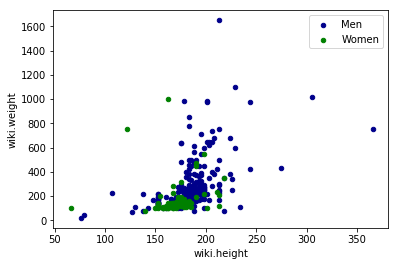

In [53]:
for i, group in physical_knn.groupby(women):
    if not i:
        ax = group.plot(kind='scatter', x='wiki.height', y='wiki.weight', 
                        color='DarkBlue', label='Men');
    else:
        print(i)
        group.plot(kind='scatter', x='wiki.height', y='wiki.weight', 
                          color='Green', label='Women', ax=ax)

print(physical_knn.groupby(women).aggregate(np.mean))

#### Training the Classifier

In [54]:
from sklearn import neighbors
classifier = neighbors.KNeighborsClassifier()

In [55]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
predict = classifier.predict(X_test)
predict

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,

In [57]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predict)
precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, predict)
print("* Accuracy: {:.2f}%".format(accuracy*100))
print("* Precision: {}\n* Recall: {}.\n* F1-Score: {}".format(accuracy*100, precision, recall, f1))

* Accuracy: 81.27%
* Precision: 81.27490039840637
* Recall: [ 0.86631016  0.65625   ].
* F1-Score: [ 0.88043478  0.62686567]


(39.0, 400)

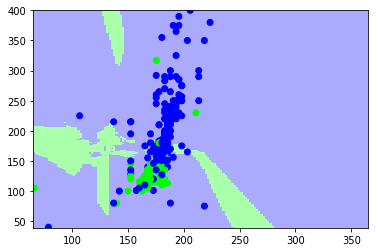

In [58]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#0000FF', '#00FF00'])

step = 2

x_min, x_max = X_test['wiki.height'].min() - 1, X_test['wiki.height'].max() + 1
y_min, y_max = X_test['wiki.weight'].min() - 1, X_test['wiki.weight'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))    
prediction = classifier.predict(X_test)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter( X_test['wiki.height'], X_test['wiki.weight'], c=y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), 400)

### Cultural Classifier

Let's start off with a classifier for higher education and citizenship amongst the male and female heroes and villians

In [59]:
# data preprocessing

import sklearn
from sklearn import neighbors
from sklearn import metrics
from math import floor

cultural_knn = clean_df[['wiki.education', 'wiki.citizenship', 'Women', 'Villain']]
cultural_knn.dtypes

wiki.education      object
wiki.citizenship    object
Women                 bool
Villain               bool
dtype: object

There aren't too many international characters, so let's split the data between US and non-US citizens.

In [60]:
usa = cultural_knn['wiki.citizenship'].map(lambda x: 'U.S.A' in x)
cultural_knn['USA'] = usa
cultural_knn = cultural_knn.drop('wiki.citizenship', 1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
cultural_knn

,wiki.education,Women,Villain,USA
name,,,,
Abomination (Emil Blonsky),Unrevealed,False,True,False
Absorbing Man,High school dropout,False,True,True
Abyss,Unrevealed,False,True,False
Agent Zero,Unrevealed,False,True,False
Annihilus,Unrevealed,False,True,False
Apocalypse,Centuries of study and experience,False,True,False
Spider-Girl (Anya Corazon),High school student,True,False,True
Arcade,Unrevealed,False,True,True
Archangel,College degree from Xavier's School for Gifted...,False,False,True


In [62]:
def delete_without_education(cultural_knn, not_education):
    for word in not_education:
        cultural_knn = cultural_knn[~cultural_knn['wiki.education'].str.contains(word)]
    return cultural_knn

In [63]:
# Delete all that containg unuseful data such as "Unreveal", "None", "unknown", etc.
cultural_knn = delete_without_education(cultural_knn, ["Unrevealed", "unrevealed", 'None', 'none', 'Not applicable',
                                                       'Unknown', 'unknown', 'Inapplicable', 'Limited'])
cultural_knn = cultural_knn[cultural_knn['wiki.education'] != '']

# Make groups by education level
education = cultural_knn['wiki.education']

unfinished = education.map(lambda x: 'unfinished' in x or 'dropout' in x or 'incomplete' in x
                           or 'drop-out' in x or 'No official schooling' in x 
                           or 'No formal education' in x or 'Unfinished' in x
                           or 'Incomplete' in x)
education[unfinished].tolist()
education = education[~unfinished]

phd = education.map(lambda x: 'Ph.D' in x or 'master' in x or 'Masters' in x or 'PhD' in x  
                    or 'doctorate' in x or 'Doctorate' in x or 'Ph.d.' in x or 'Doctoral' in x 
                    or 'NASA' in x or 'Journalism graduate' in x or 'scientist' in x
                    or 'Geneticist' in x or 'residency' in x)
education[phd].tolist()
education = education[~phd]

college = education.map(lambda x: 'College' in x or 'college' in x or 'University' in x 
                        or 'post-graduate' in x or 'B.A' in x or 'B.S.' in x or 'university' in x  
                        or 'Master' in x or 'Collage' in x or 'Degree' in x or 'degree' in x
                        or 'Engineering' in x or 'engineer' in x or 'programming' in x
                        or 'Programming' in x or 'Doctor' in x or 'Medical school' in x
                        or 'higher education' in x) 
education[college].tolist()
education = education[~college]

militar = education.map(lambda x: 'Military' in x or 'Xandarian Nova Corps' in x  or 'FBI' in x
                        or 'S.H.I.E.L.D.' in x or 'military' in x or 'Nicholas Fury' in x 
                        or 'Warrior' in x or 'combat' in x or 'Combat' in x or 'Soldier' in x
                        or 'spy academy' in x or 'Police' in x or 'warfare' in x or 'Public Eye' in x)
education[militar].tolist()
education = education[~militar]

hs = education.map(lambda x: 'High school' in x or 'high school' in x or 'High-school' in x 
                   or 'High School' in x or 'high School' in x)
education[hs].tolist()
education = education[~hs]

tutored = education.map(lambda x: 'Tutored' in x or 'tutors' in x or 'tutored' in x 
                        or 'Mentored' in x or 'Home schooled' in x  or 'Private education' in x)
education[tutored].tolist()
education = education[~tutored]

autodidact = education.map(lambda x: 'Self-taught' in x or 'self-taught' in x 
                            or 'Little or no formal schooling' in x or 'Little formal schooling' in x
                            or 'Some acting school' in x or 'through observation' in x)
education[autodidact].tolist()
education = education[~autodidact]

special = education.map(lambda x: 'Sorcery' in x or 'cosmic experience' in x or 'magic' in x 
                        or 'Priests of Pama' in x or 'Xavier Institute' in x or 'Carlos Javier’s' in x
                        or 'Self educated' in x or 'Shao-Lom' in x or 'Centuries of study and experience' in x
                        or 'Askani' in x or 'Madame DuPont' in x or 'Titanian' in x or 'arcane arts' in x
                        or 'Muir-MacTaggert' in x or 'Uploaded data' in x or 'Programmed' in x
                        or 'Accelerated' in x or 'Inhumans' in x or 'Able to access knowledge' in x
                        or 'lifetime' in x or 'Watchers\' homeworld' in x or 'Uranian Eternals' in x
                        or 'Arcturus' in x or 'Oatridge School for Boys' in x)
education[special].tolist()
education = education[~special] 

basic = education.map(lambda x: 'Self-taught' in x or 'Homed schooled' in x or 'graduate school' in x
                      or 'Elementary school' in x or 'Secondary school' in x or 'school graduate' in x
                      or 'Boarding school' in x or 'Massachusetts Academy' in x
                      or 'school graduate' in x)
education[basic].tolist()
education = education[~basic]

In [64]:
educational_dict = {'autodidact': autodidact, 'unfinished': unfinished, 'superior': phd, 'college':college, 
                    'militar': militar, 'high school':hs, 'tutored': tutored, 'special':special, 'basic': basic}

numeric = {'autodidact': 1, 'unfinished': 2, 'superior': 3, 'college':4, 
           'militar': 5, 'high school':6, 'tutored': 7, 'special':8, 'basic': 9}

In [65]:
def clean_education_levels(educational_dict, cultural_knn):
    for k, education in educational_dict.items():
        index = education[education.loc[:]].index
        for character in index:
            cultural_knn.loc[character, 'wiki.education'] = numeric[k]

In [66]:
clean_education_levels(educational_dict, cultural_knn)

### Splitting the Corpus Between Training Data and Testing Data

In [67]:
TRAIN_PERCENTAGE = 0.8
train_section = floor(cultural_knn.shape[0]*TRAIN_PERCENTAGE)
test_section = cultural_knn.shape[0]-train_section
print("We will be using {} characters for training the classifier and"\
      " {} for testing the trained classifier.\n".format(train_section, test_section))

train_rows = np.random.choice(cultural_knn.index.values, train_section)
test_rows = np.setdiff1d(cultural_knn.index.values,train_rows)

print(cultural_knn.loc[train_rows[0]])

We will be using 344 characters for training the classifier and 87 for testing the trained classifier.

wiki.education        4
Women             False
Villain           False
USA                True
Name: Human Torch, dtype: object


In [68]:
for i, group in cultural_knn.groupby(women):
    print(group)

                           wiki.education  Women  Villain    USA
name                                                            
Absorbing Man                           2  False     True   True
Apocalypse                              8  False     True  False
Archangel                               4  False    False   True
Banshee                                 4  False    False  False
Baron Strucker                          4  False     True  False
Baron Zemo (Heinrich Zemo)              3  False     True  False
Batroc the Leaper                       5  False     True  False
Beak                                    4  False    False   True
Beast                                   3  False    False   True
Big Wheel                               4  False    False   True
Black Panther                           3  False    False  False
Black Tom                               4  False     True  False
Blackheart                              7  False     True  False
Blade                    

In [69]:
X_train = cultural_knn.loc[train_rows][['wiki.education','USA']]
y_train = cultural_knn.loc[train_rows]['Women']

X_test = cultural_knn.loc[test_rows][['wiki.education','USA']]
y_test = cultural_knn.loc[test_rows]['Women']

classifier = neighbors.KNeighborsClassifier()

classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, predict)
precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, predict)
print("* Accuracy: {:.2f}%".format(accuracy*100))
print("* Precision: {}\n* Recall: {}.\n* F1-Score: {}".format(accuracy*100, precision, recall, f1))

* Accuracy: 61.08%
* Precision: 61.08108108108108
* Recall: [ 0.74615385  0.29090909].
* F1-Score: [ 0.71323529  0.32653061]


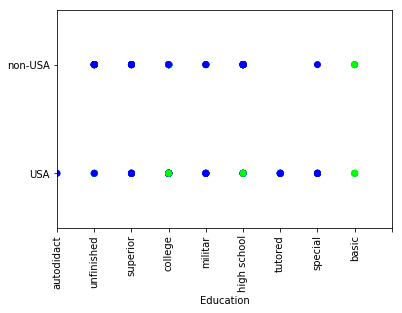

In [70]:
cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#0000FF', '#00FF00'])

step = 1

xx, yy = np.meshgrid(np.arange(1, 10, step),
                     np.arange(0, 1, step))    
prediction = classifier.predict(X_test)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter( X_test['wiki.education'], X_test['USA'], c=y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.yticks(range(0,2),['USA', 'non-USA'], rotation='horizontal')
plt.ylim(-0.5, 1.5)
plt.xticks(range(1,11), list(numeric.keys()), rotation='vertical')
plt.xlabel("Education")

# Conclusions

Based on the data that we've used, it appears that female characters are more likely to be more educated than women who are US citizens. The classifier predicts that women superheroes will receive higher education or more likely to achieve any other form of education outside of primary and secondary school. 